In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('.\data\geo.xlsx', header=0)

In [3]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


In [5]:
data.describe()

,x,y,comment_class
count,108806.000000,108806.000000,108806.000000
mean,37.567532,55.766346,-0.748929
std,0.121996,0.069622,0.662653
min,37.148813,55.496939,-1.000000
25%,37.454528,55.729797,-1.000000
50%,37.559640,55.764734,-1.000000
75%,37.684784,55.806869,-1.000000
max,37.931228,55.994174,1.000000


In [6]:
coordinates_data = data[['x', 'y']]
coordinates_data.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


### Визуализируем часть данных

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
coordinates_data_sample = coordinates_data.sample(20000, random_state=42)

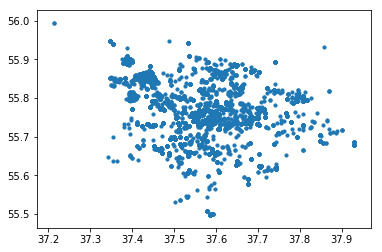

In [9]:
plt.scatter(coordinates_data_sample['x'], coordinates_data_sample['y'], s=10)

### Кластеризуем все данные

In [10]:
from sklearn.cluster import KMeans

clusters_count = range(1, 15)
models = [KMeans(n_clusters=i, random_state=42, max_iter=500, init='random') for i in clusters_count]
inertia_values = [model.fit(coordinates_data).inertia_ for model in models]

Text(0,0.5,'Инерция')

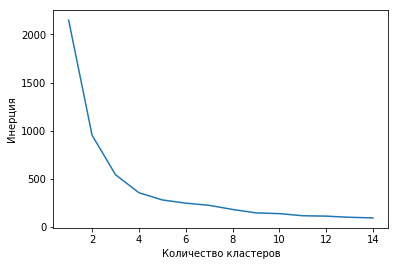

In [11]:
plt.plot(clusters_count, inertia_values)
plt.xlabel(u'Количество кластеров')
plt.ylabel(u'Инерция')

In [12]:
import numpy as np

diff = np.diff(inertia_values)
diff_r = diff[1:] / diff[:-1]
k_opt = clusters_count[np.argmin(diff_r) + 1]
print(u'Оптимальное количество кластеров по методу локтя:', k_opt)

Оптимальное количество кластеров по методу локтя: 11


In [13]:
kmeans_model_opt = models[k_opt - 1]
predictions = kmeans_model_opt.predict(coordinates_data)

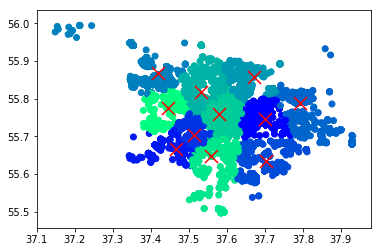

In [14]:
plt.scatter(coordinates_data['x'], coordinates_data['y'], c=predictions, cmap='winter')
#Обозначим центроиды красными крестами
plt.scatter(kmeans_model_opt.cluster_centers_[:, 0], kmeans_model_opt.cluster_centers_[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

### Кластеризуем отдельно голоса за и против

In [15]:
positive_data = data[data['comment_class'] == 1]
negative_data = data[data['comment_class'] == -1]

positive_coordinates_data = positive_data[['x', 'y']]
negative_coordinates_data = negative_data[['x', 'y']]

clusters_count = range(1, 15)
positive_models = [KMeans(n_clusters=i, random_state=42, max_iter=500, init='random') for i in clusters_count]
positive_inertia_values = [model.fit(positive_coordinates_data).inertia_ for model in positive_models]

clusters_count = range(1, 15)
negative_models = [KMeans(n_clusters=i, random_state=42, max_iter=500, init='random') for i in clusters_count]
negative_inertia_values = [model.fit(negative_coordinates_data).inertia_ for model in negative_models]

Text(0,0.5,'Инерция')

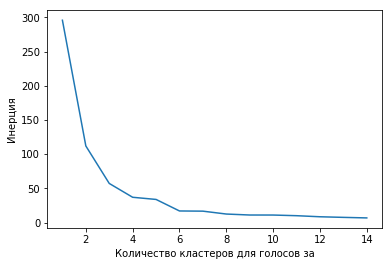

In [16]:
plt.plot(clusters_count, positive_inertia_values)
plt.xlabel(u'Количество кластеров для голосов за')
plt.ylabel(u'Инерция')

Text(0,0.5,'Инерция')

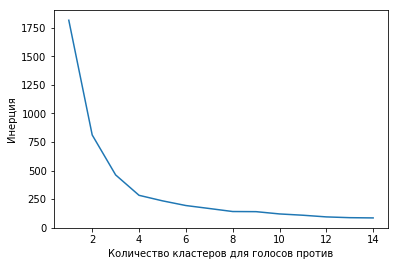

In [17]:
plt.plot(clusters_count, negative_inertia_values)
plt.xlabel(u'Количество кластеров для голосов против')
plt.ylabel(u'Инерция')

In [18]:
positive_diff = np.diff(positive_inertia_values)
positive_diff_r = positive_diff[1:] / positive_diff[:-1]
positive_k_opt = clusters_count[np.argmin(positive_diff_r) + 1]
print(u'Оптимальное количество кластеров по методу локтя для голосов за:', positive_k_opt)

negative_diff = np.diff(negative_inertia_values)
negative_diff_r = negative_diff[1:] / negative_diff[:-1]
negative_k_opt = clusters_count[np.argmin(negative_diff_r) + 1]
print(u'Оптимальное количество кластеров по методу локтя для голосов против:', negative_k_opt)

Оптимальное количество кластеров по методу локтя для голосов за: 6
Оптимальное количество кластеров по методу локтя для голосов против: 8


In [19]:
positive_kmeans_model_opt = positive_models[positive_k_opt - 1]
positive_predictions = positive_kmeans_model_opt.predict(positive_coordinates_data)

negative_kmeans_model_opt = negative_models[negative_k_opt - 1]
negative_predictions = negative_kmeans_model_opt.predict(negative_coordinates_data)

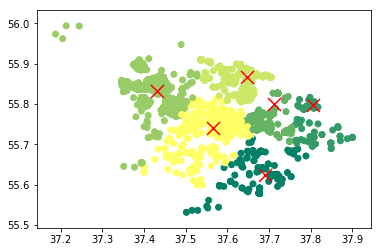

In [20]:
plt.scatter(positive_coordinates_data['x'], positive_coordinates_data['y'], c=positive_predictions, cmap='summer')
#Обозначим центроиды красными крестами
plt.scatter(positive_kmeans_model_opt.cluster_centers_[:, 0], positive_kmeans_model_opt.cluster_centers_[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

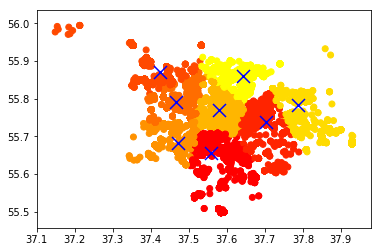

In [21]:
plt.scatter(negative_coordinates_data['x'], negative_coordinates_data['y'], c=negative_predictions, cmap='autumn')
#Обозначим центроиды красными крестами
plt.scatter(negative_kmeans_model_opt.cluster_centers_[:, 0], negative_kmeans_model_opt.cluster_centers_[:, 1],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)